线性不可分:假如你是工厂主管,你要决定是否芯片要被接受或抛弃

线性不可分

特征映射:
特征映射指的是通过某种函数或变换规则，把原始特征空间中的数据点映射到一个新的特征空间。原始特征空间的数据可能存在信息不足、线性不可分等问题，而通过特征映射可以生成新的特征，让数据在新空间中更易于分析和建模。
常见方法有:多项式映射(数值型数据),核函数映射(支持向量积),卷积(图像,文本)
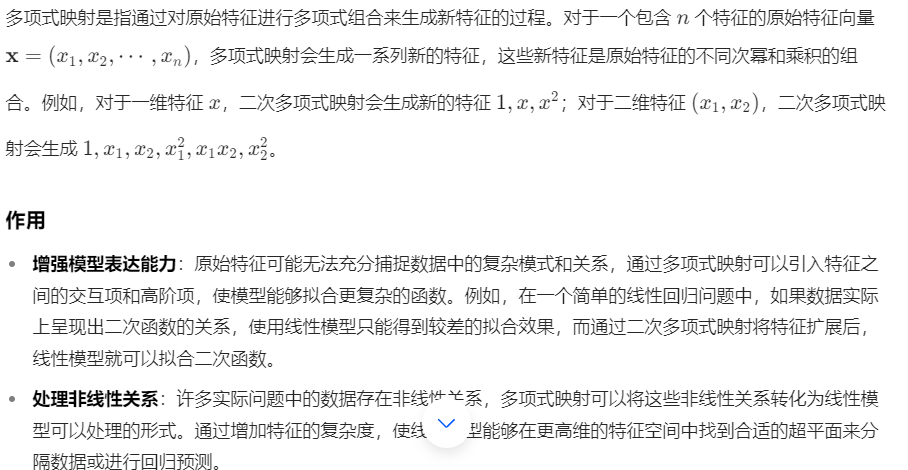
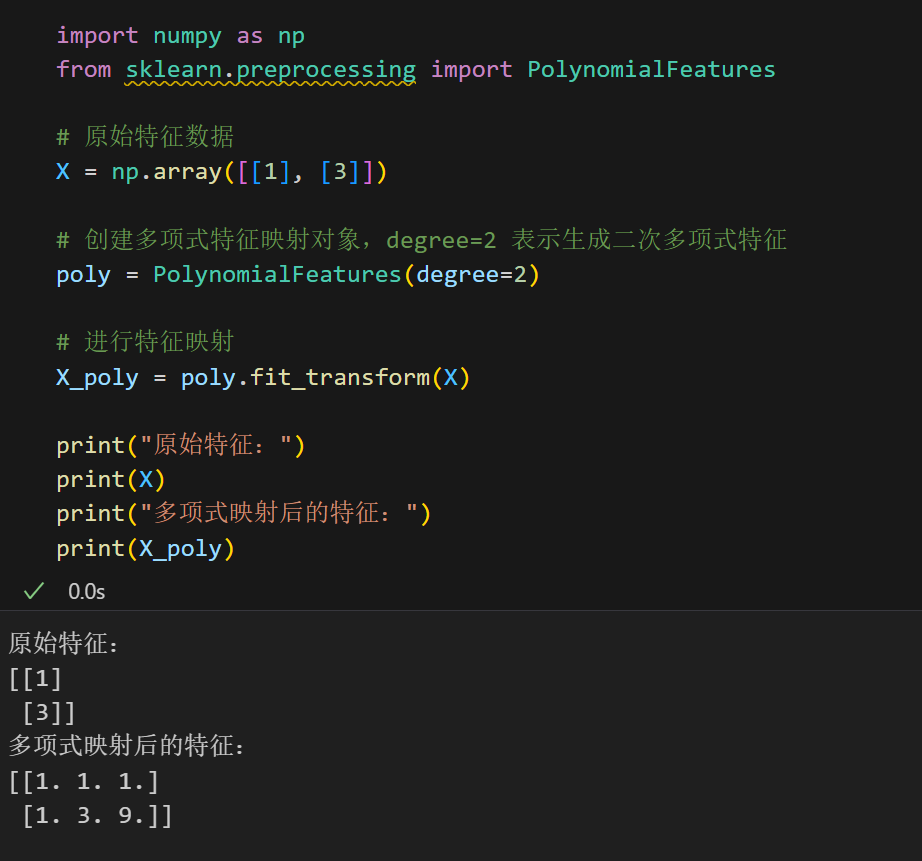

PolynomialFeatures 期望输入的数组是二维的，而代码中 x1 和 x2 经过 iloc 提取后如果只有一列，在转换为 numpy 数组时会变成一维数组，这可能会导致 PolynomialFeatures 处理时出现不符合预期的结果,即应传入x=(x1,x2,x3,x4...)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# -------------------------- 1. 数据加载与可视化 --------------------------
data=pd.read_csv(r"C:\Users\HP\Desktop\高速下载-17457248894892024吴恩达资料\2014版 吴恩达机器学习全套资料\吴恩达机器学习课后作业源码及笔记\ex2-logistic regression\ex2data2.txt",header=None,names=['test1','test2','accepted'])

# 绘制原始数据分布
fig, ax = plt.subplots()
ax.scatter(data[data['accepted']==0]['test1'], data[data['accepted']==0]['test2'], marker='x', label='y=0')
ax.scatter(data[data['accepted']==1]['test1'], data[data['accepted']==1]['test2'], marker='o', label='y=1')
ax.set(xlabel='test1', ylabel='test2')
ax.legend()
plt.show()

In [ ]:
# -------------------------- 2. 特征映射与标准化 --------------------------
def feature_mapping(x1, x2, power=6):
    """生成多项式特征"""
    data={}
    for i in np.arange(power+1):
        for j in np.arange(i+1):
            data['F{}{}'.format(i-j,j)]=np.power(x1,i-j)*np.power(x2,j)
    return pd.DataFrame(data)
# 生成6阶多项式特征
x1 = data['test1']
x2 = data['test2']
#x1.shape=(118,)=x2,是一维数组,不分行列,和列表相似
data_poly = feature_mapping(x1, x2, power=6)
print(data_poly.head())
X=data_poly.iloc[:,0:]#x之前特征映射已经有了全部为1的一列
y=data.iloc[:,-1]
X=np.array(X)
y=np.array(y)
y=y.reshape(len(y),1)#一维数组转化为二维
print(y.shape)
print(X.shape)

In [ ]:
# -------------------------- 3. 模型核心函数 --------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def cost_function(X, y, theta, lambda_):
    """带正则化的损失函数"""
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))#np.log()是自然对数
    reg = (lambda_ / (2 * m)) * np.sum(theta[1:]**2)  # 排除截距项
    return cost + reg
def gradient_descent(X, y, theta, alpha, lambda_, num_iters):
    """带正则化的梯度下降"""
    m = len(y)
    costs = [] 
    for _ in range(num_iters):
        h = sigmoid(X @ theta)
        reg_term = (lambda_ / m) * theta
        reg_term[0] = 0  # 不惩罚截距项
        gradient = (X.T @ (h - y)) / m + reg_term
        theta -= alpha * gradient
        costs.append(cost_function(X, y, theta, lambda_))
    return theta, costs

In [ ]:
# -------------------------- 4. 模型训练 --------------------------
# 参数初始化
theta = np.zeros((X.shape[1], 1))#返回x的列数,0则是行数
print(theta.shape)
alpha = 0.01      # 学习率
lambda_ = 0.01  # 正则化系数
num_iters = 400000

# 训练模型
theta, costs = gradient_descent(X, y, theta, alpha, lambda_, num_iters)
plt.plot(np.arange(num_iters),costs,label='vs')
plt.xlabel('num_iters')
plt.ylabel('costs')
plt.show()
# -------------------------- 5. 准确率计算 --------------------------
def predict(X, theta):
    """预测函数"""
    p=[]
    prob = sigmoid(X @ theta)
    for i in prob:
        if i>0.5:
            p.append(1)
        else:
            p.append(0)
    return p           
y1=np.array(predict(X,theta))
y1=y1.reshape(len(y1),1)
print(np.mean(y1==y))

plt.contour(X, Y, Z, [levels], **kwargs)X 表示网格点的 x 坐标，Y 表示网格点的 y 坐标。如果不提供 X 和 Y，则默认使用数组的索引作为坐标。
z包含了对应于 (X, Y) 坐标点的数值，这些数值将决定等高线的位置和形状。Z 的形状必须与 X 和 Y 一致（如果提供了 X 和 Y）
levels（可选）
它可以是一个整数、一个列表或数组。
如果是整数，则表示要绘制的等高线的数量，matplotlib 会自动计算合适的等高线级别。
如果是列表或数组，则明确指定要绘制的等高线的值。例如，[1, 2, 3] 表示只绘制值为 1、2 和 3 的等高线,[5]绘制值为5的。
注意:levels=0,是绘制值为0的线
当没有levels时,在 z[min_val, max_val] 这个区间内自动选择一系列合适的数值作为等高线的层级。具体来说，matplotlib 会尝试使用一个合理的间隔来划分这个区间，以生成一系列能较好展示数据分布特征的等高线


In [ ]:
# -------------------------- 6. 决策边界可视化 --------------------------
"这段代码先是生成网格点以此来选取有限个有代表性的 \((x, y)\) 坐标对"
"然后将网格点扁平化再进行特征化(前面的特征化数据是为了求theta),得到h=(x1,x2)中所有含有变量的项的表达式"
"最后与theta点乘得到预测值zz,绘制等高线时zz又必须与xx的形状相同"
# 生成网格点
x = np.linspace(-1.2, 1.2, 200)
xx, yy = np.meshgrid(x, x)
z=np.array(feature_mapping(xx.ravel(),yy.ravel(),6))#若要对二维平面上的点 (x, y) 进行多项式特征映射，
#把 x 和 y 转换为一维数组后，就可以方便地对每一对 (x[i], y[i]) 进行特征映射
print(z.shape)
zz=z@theta
print(zz.shape)
zz=zz.reshape(xx.shape)#把一维的预测值向量 zz (必须和x相同)重新调整为和 xx 相同的二维形状，方便后续用于绘制二维图形，例如绘制等高线图来展示预测结果
print(zz.shape)
fig, ax = plt.subplots()
ax.scatter(data[data['accepted']==0]['test1'], data[data['accepted']==0]['test2'], marker='x', label='y=0')
ax.scatter(data[data['accepted']==1]['test1'], data[data['accepted']==1]['test2'], marker='o', label='y=1')
ax.set(xlabel='test1', ylabel='test2')
ax.legend()
plt.contour(xx,yy,zz,0,colors='r',linestyles='-')#绘制zz=0的线.因为阀值为0.5,及h=(x1,x2)=0,颜色和线条均为复数
plt.show()

网格点:np.meshgrid 函数接收多个一维数组当作输入，接着返回多个二维数组，这些二维数组共同构成了一个网格。对于 np.meshgrid(x, x) 而言，它会依据一维数组 x 生成两个二维数组 xx 和 yy。
xx：是一个二维数组，每一行都是 x 的一个副本。
yy：也是一个二维数组，每一列都是 x 的一个副本
eg: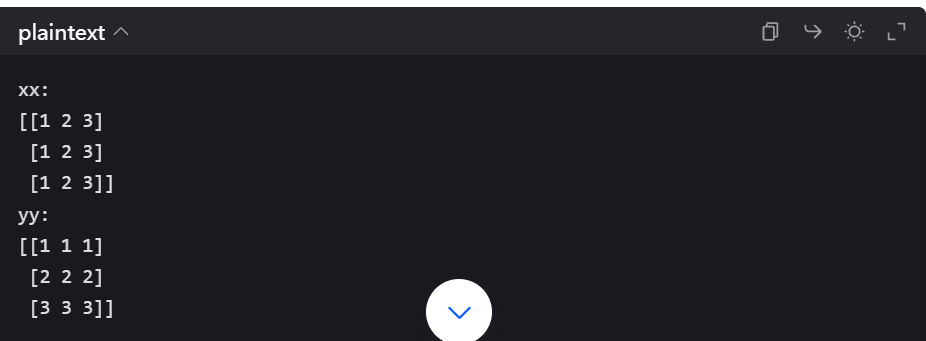
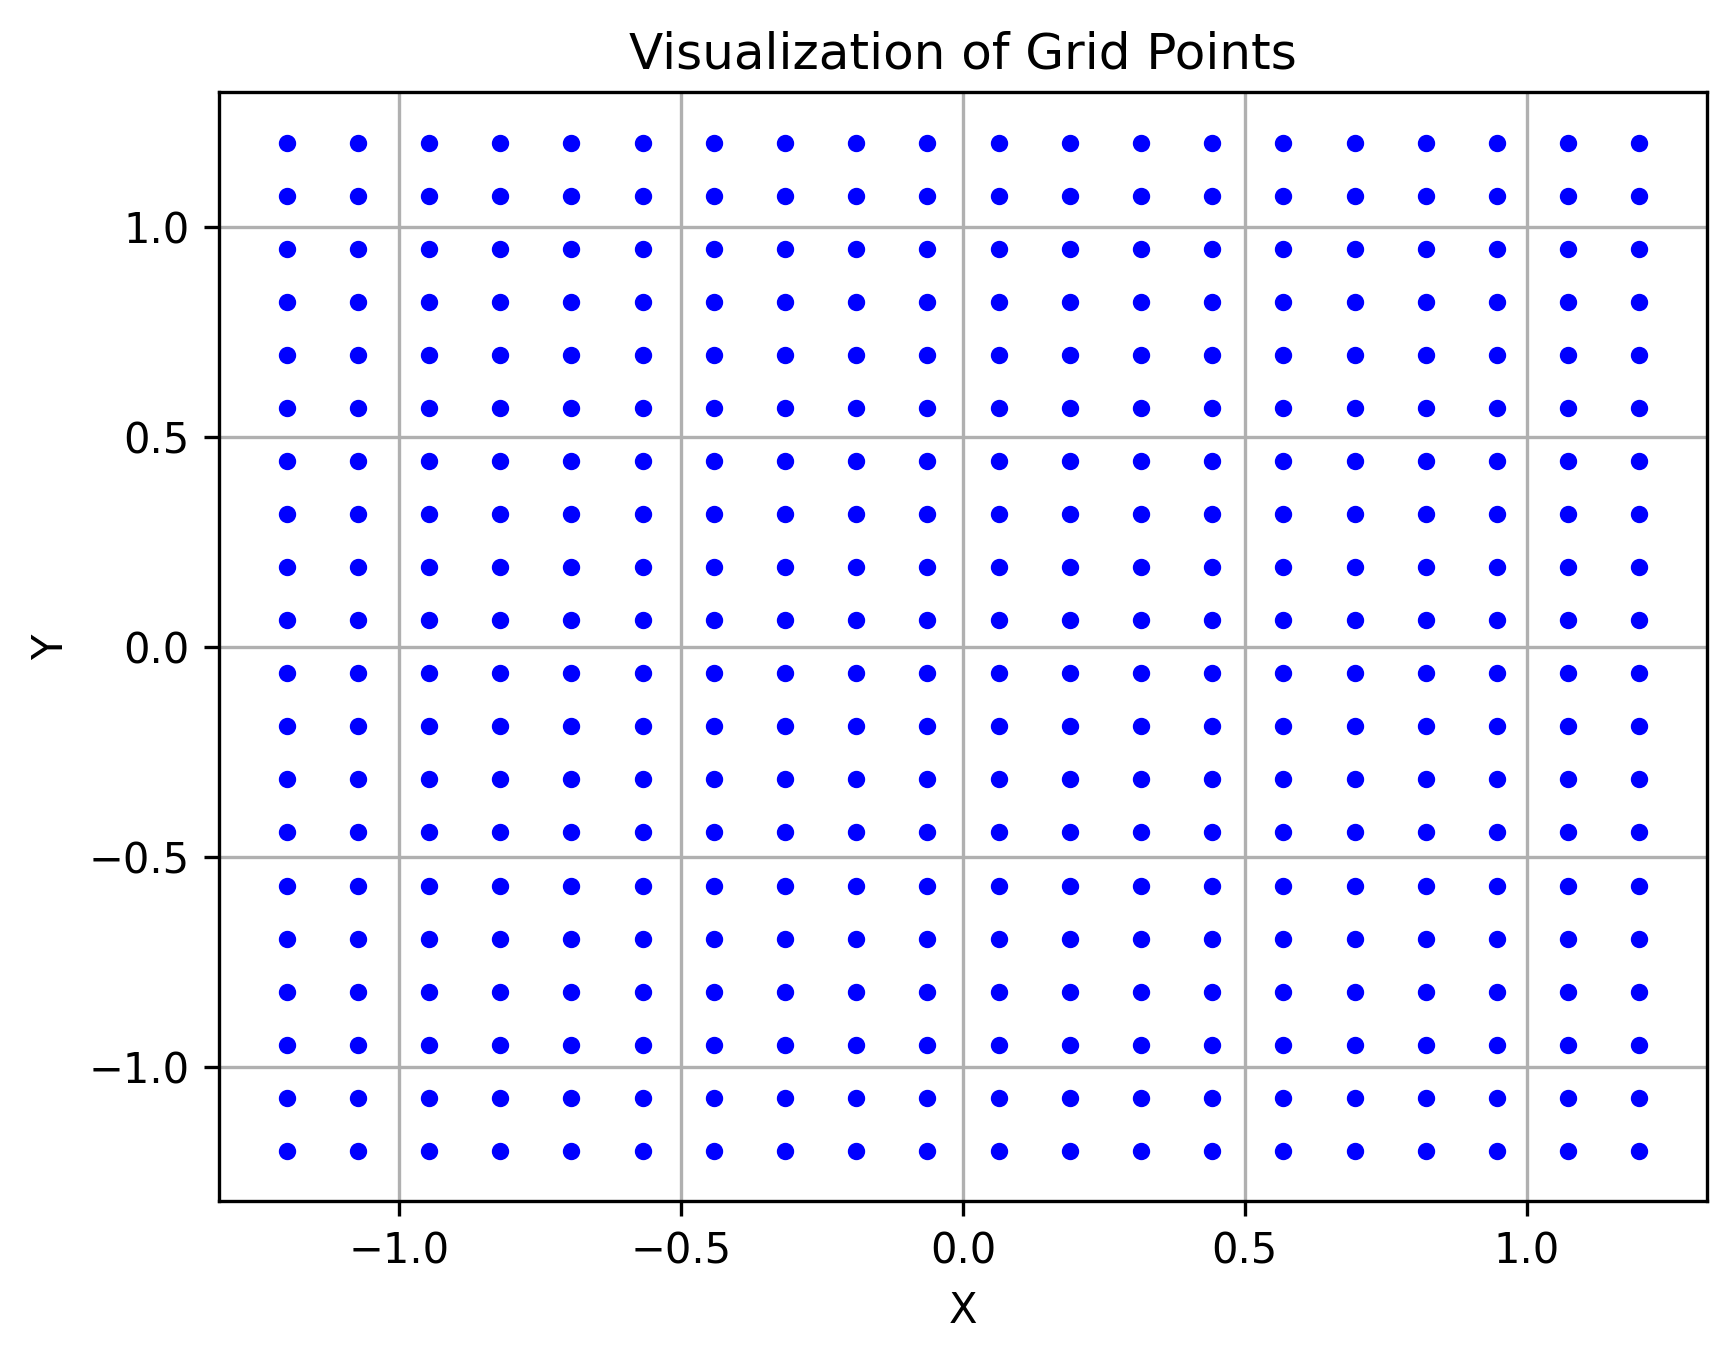
为什么要:np.meshgrid 生成的网格点就提供了这样一组离散的采样点。例如，对于函数 \(z = x^2 + y^2\)，我们不可能计算出所有 x 和 y 组合对应的 z 值，通过生成网格点，就能选取有限个有代表性的 \((x, y)\) 坐标对，进而计算出对应的 z 值，以此近似表示整个函数的分布。
在上面的代码中，zz = f(xx, yy) 就是一个向量化操作，它会一次性计算出所有网格点对应的 z 值，而不需要使用嵌套循环逐个计算每个点的值。如果不使用网格点，就需要手动编写嵌套循环来遍历 x 和 y 的所有组合，代码会变得更复杂，计算效率也会降低。
在绘制二维图形，例如等高线图、热力图、三维曲面图时，需要知道二维平面上各个点的坐标及其对应的值
等高线:对于z=f(x,y),不同的 x 和 y 组合会得到不同的 z 值，等高线图会将 z 值相等的点连接起来，形成一系列的同心圆圈
三维信息的映射：等高线图通过 “线条”（等高线）映射 z 值的等值面；热力图通过 “颜色” 映射 z 值的大小。
两者都是将三维数据（或二维网格上的数值）转换为二维平面上的视觉特征（线条或颜色），属于二维可视化手段。


正则化: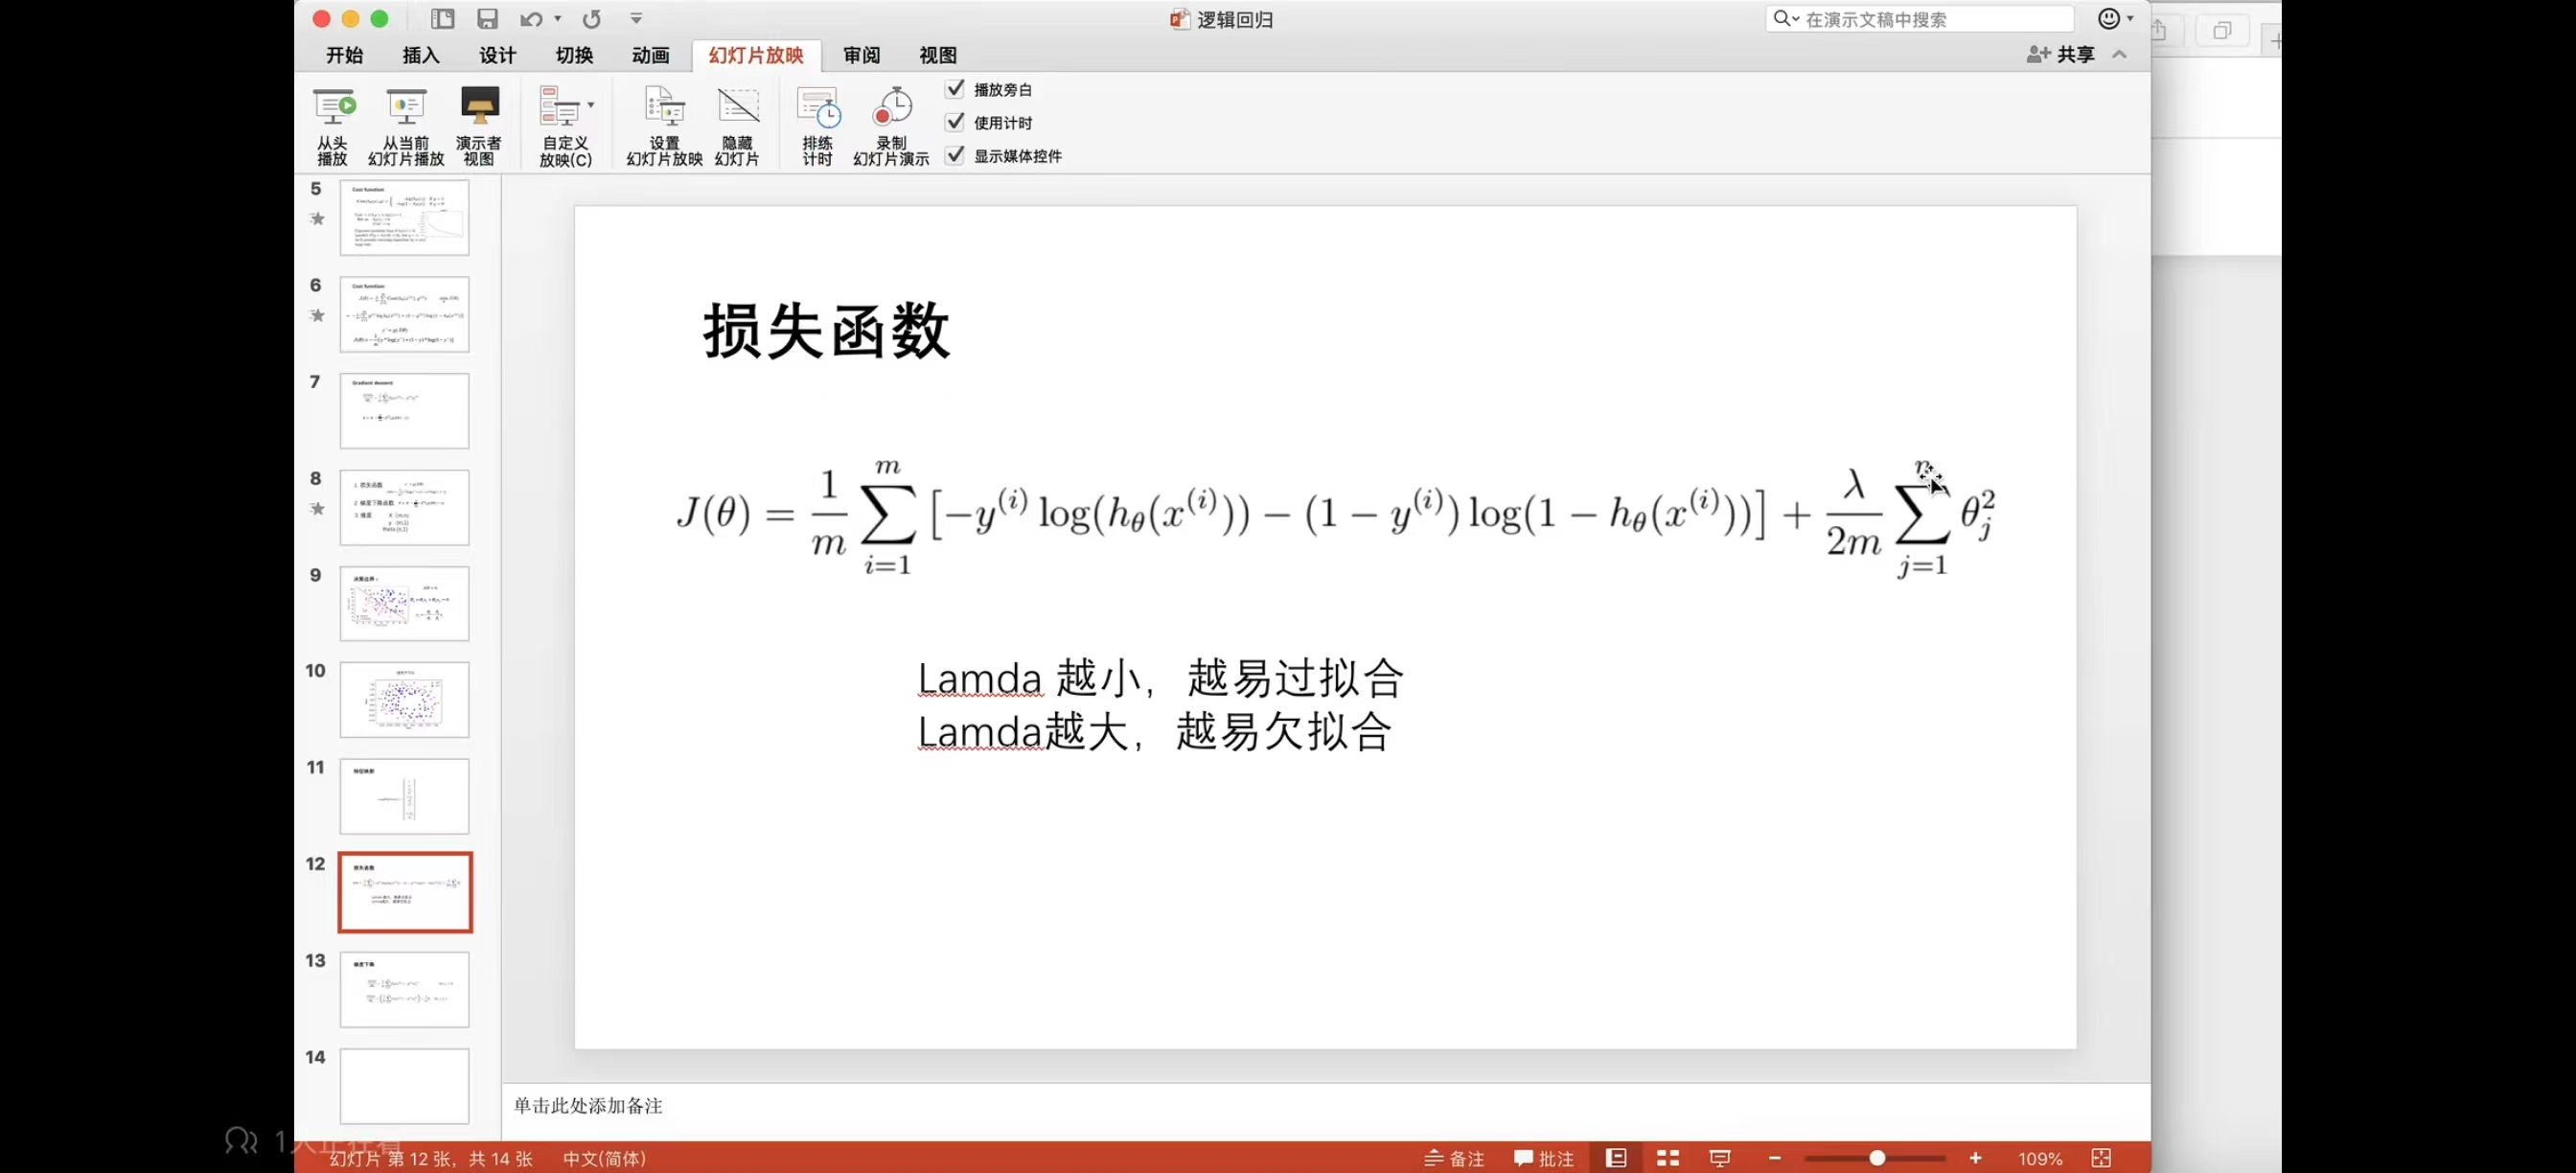
注意j是从1开始,如果对theta[0,0]也进行正则化惩罚，会限制截距项自由调整，可能导致模型无法很好地拟合数据。

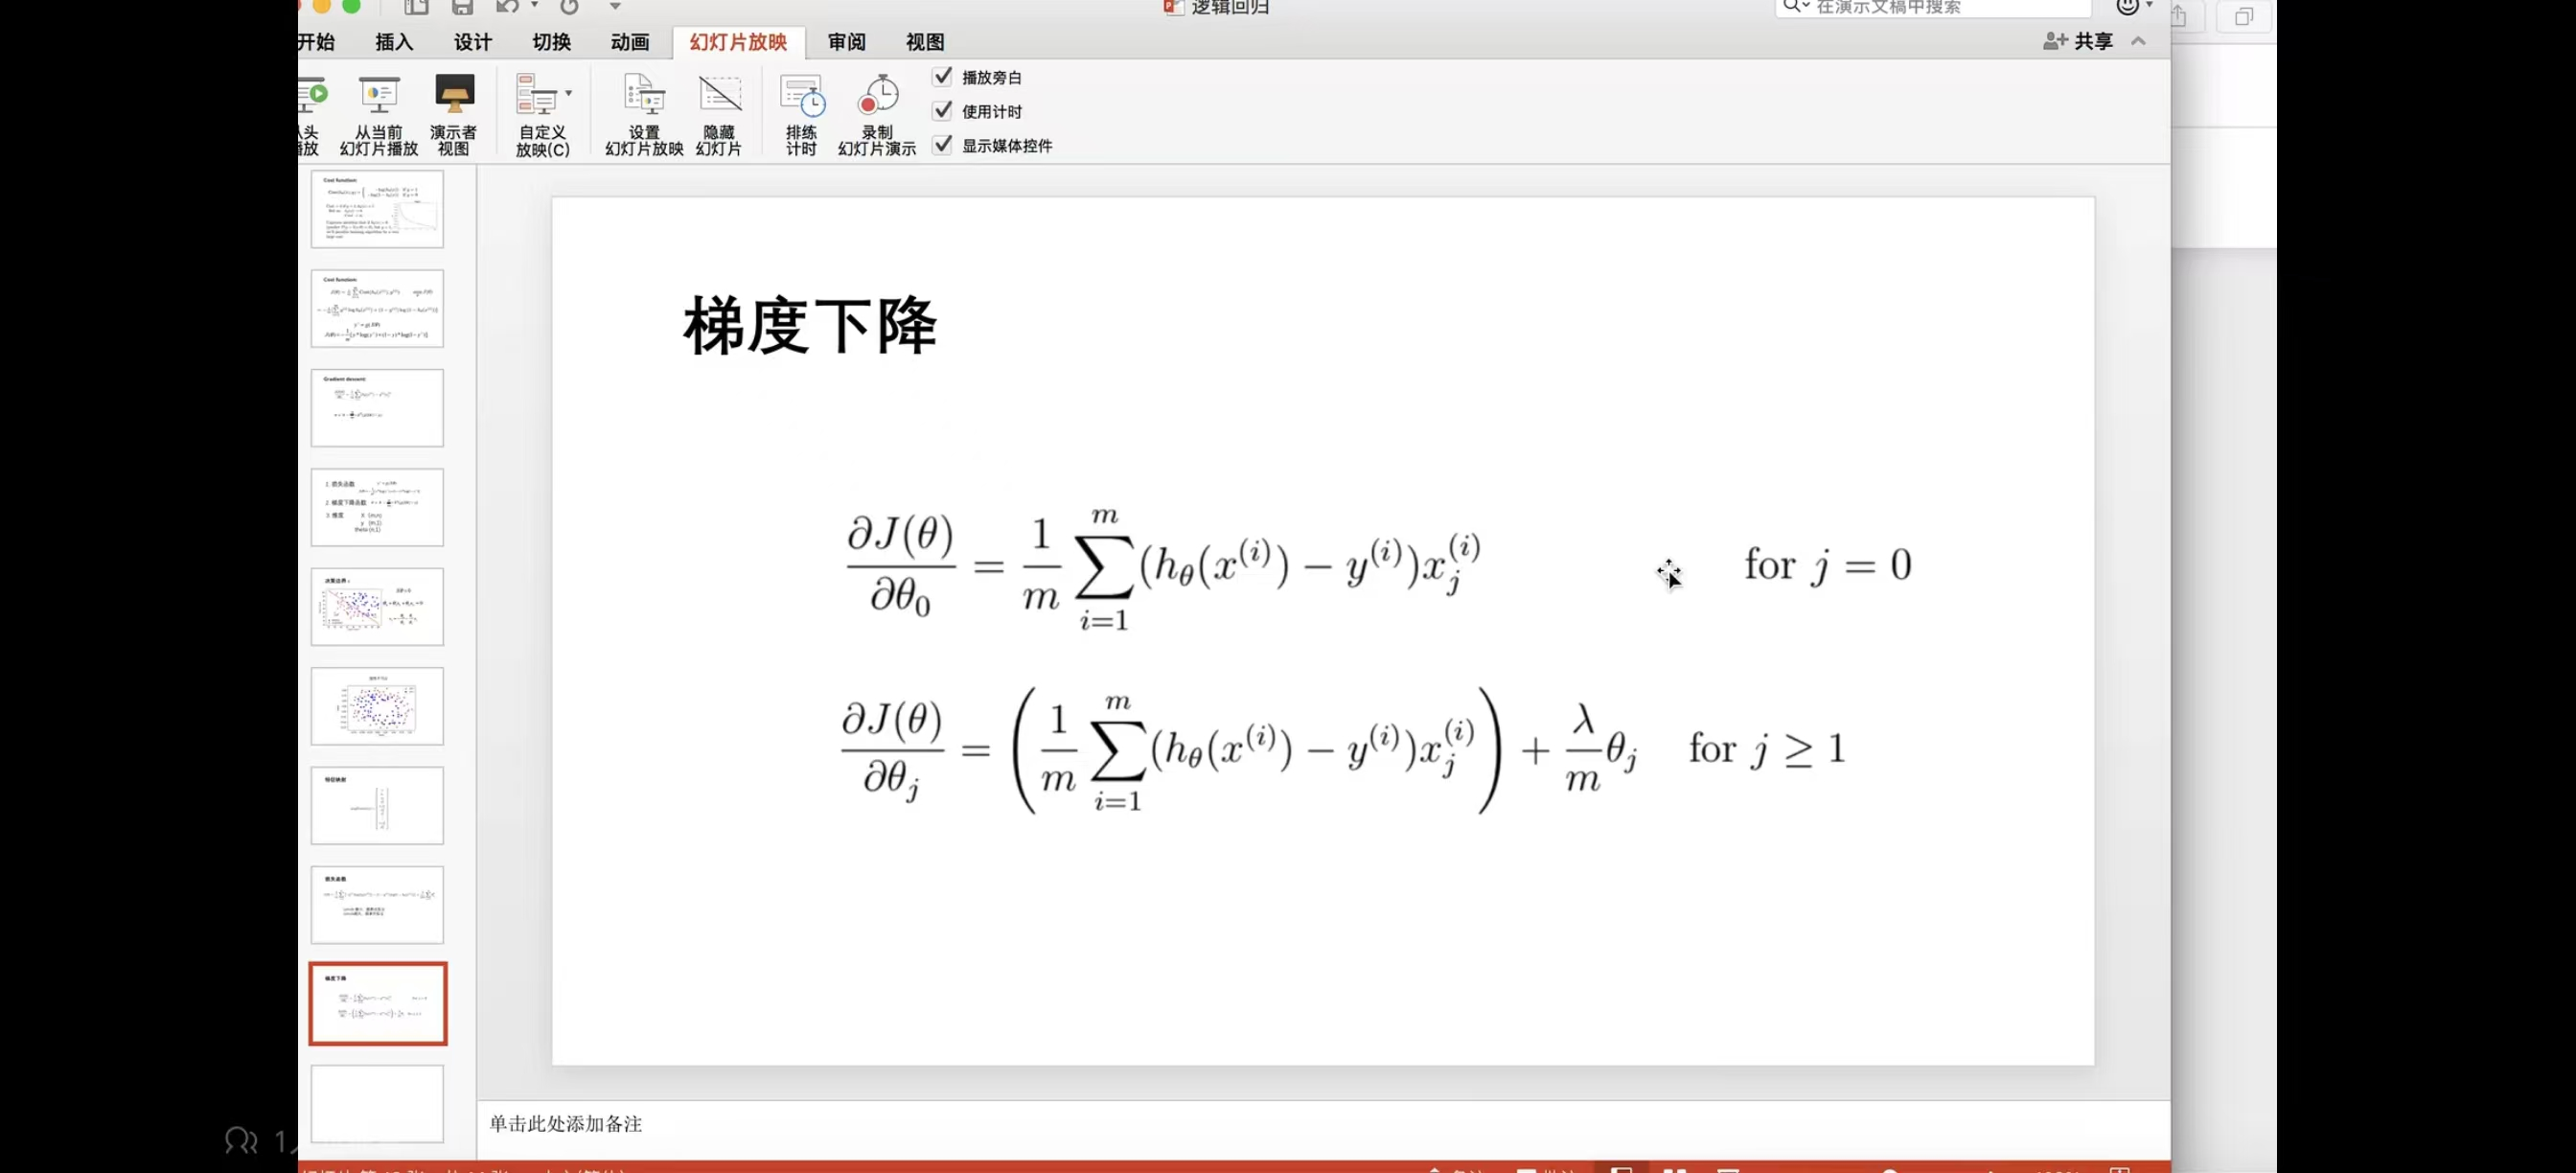
截距项是独立于输入特征的偏移量，对其正则化可能限制模型对数据的拟合能力。所以在计算截距项的梯度时，只需按照普通逻辑回归梯度公式计算
np.insert(reg,0,values=0,axis=0),reg是要插入数组,0代表插入位置,axis=0表示沿着数组的第一个轴（通常是行方向）进行插入操作。
若沿着列操作,则会多出一列0